# Machine Learning

## Machine learning: the problem setting

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

* supervised learning, in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:
    * classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.
    * regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

* unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization (Click here to go to the Scikit-Learn unsupervised learning page).

## MUST READ -> [GLOSSARY](https://scikit-learn.org/stable/glossary.html#glossary)
## Loading an example dataset

```python

from sklearn import datasets

digits = datasets.load_digits()
print(digits.data)
print(digits.target)


```

## Learning and predicting

In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

**EVERY LEARNING PROBLEM IS FORMULATED BY X and y. X(INPUT) y(output)**

In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).

An example of an estimator is the class sklearn.linear_model.LogisticRegression, The estimator’s constructor takes as arguments the model’s parameters.

For now, we will consider the estimator as a black box:

```python
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LR
import numpy as np

digits = datasets.load_digits()
print(digits.data)
print(digits.target)


y=digits.target.astype(np.float64)
X=digits.data.astype(np.float64)

model=LR()

model.fit(X,y)
model.score(X,y)

```



# Logistic regression {#Logistic_regression}

Logistic regression, despite its name, is a linear model for
classification rather than regression. Logistic regression is also known
in the literature as logit regression, maximum-entropy classification
(MaxEnt) or the log-linear classifier. In this model, the probabilities
describing the possible outcomes of a single trial are modeled using a
[logistic function](https://en.wikipedia.org/wiki/Logistic_function).

Logistic regression is implemented in
`LogisticRegression`. This
implementation can fit binary, One-vs-Rest, or multinomial logistic
regression with optional $\ell_1$, $\ell_2$ or Elastic-Net
regularization.

Regularization is applied by default, which is common in machine
learning but not in statistics. Another advantage of regularization is
that it improves numerical stability. No regularization amounts to
setting C to a very high value.


As an optimization problem, binary class $\ell_2$ penalized logistic
regression minimizes the following cost function:

$$\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) .$$

Similarly, $\ell_1$ regularized logistic regression solves the following
optimization problem:

$$\min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1).$$

Elastic-Net regularization is a combination of $\ell_1$ and $\ell_2$,
and minimizes the following cost function:

$$\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1),$$

where $\rho$ controls the strength of $\ell_1$ regularization vs.
$\ell_2$ regularization (it corresponds to the [l1_ratio]
parameter).

Note that, in this notation, it\'s assumed that the target $y_i$ takes
values in the set ${-1, 1}$ at trial $i$. We can also see that
Elastic-Net is equivalent to $\ell_1$ when $\rho = 1$ and equivalent to
$\ell_2$ when $\rho=0$.

The solvers implemented in the class
`LogisticRegression` are \"liblinear\",
\"newton-cg\", \"lbfgs\", \"sag\" and \"saga\":

The solver \"liblinear\" uses a coordinate descent (CD) algorithm, and
relies on the excellent C++ [LIBLINEAR
library](https://www.csie.ntu.edu.tw/~cjlin/liblinear/), which is
shipped with scikit-learn. However, the CD algorithm implemented in
liblinear cannot learn a true multinomial (multiclass) model; instead,
the optimization problem is decomposed in a \"one-vs-rest\" fashion so
separate binary classifiers are trained for all classes. This happens
under the hood, so `LogisticRegression`
instances using this solver behave as multiclass classifiers. For
$\ell_1$ regularization `sklearn.svm.l1_min_c` allows to calculate the lower bound for C in order to get a
non \"null\" (all feature weights to zero) model.

The \"lbfgs\", \"sag\" and \"newton-cg\" solvers only support $\ell_2$
regularization or no regularization, and are found to converge faster
for some high-dimensional data. Setting [multi_class] to
\"multinomial\" with these solvers learns a true multinomial logistic
regression model, which means that its probability estimates should be
better calibrated than the default \"one-vs-rest\" setting.

The \"sag\" solver uses Stochastic Average Gradient descent. It is
faster than other solvers for large datasets, when both the number of
samples and the number of features are large.

The \"saga\" solver is a variant of \"sag\" that also supports the
non-smooth [penalty=\"l1\"]. This is therefore the solver of
choice for sparse multinomial logistic regression. It is also the only
solver that supports [penalty=\"elasticnet\"].

The \"lbfgs\" is an optimization algorithm that approximates the
Broyden--Fletcher--Goldfarb--Shanno algorithm, which belongs to
quasi-Newton methods. The \"lbfgs\" solver is recommended for use for
small data-sets but for larger datasets its performance suffers.


**Feature selection with sparse logistic regression**

A logistic regression with $\ell_1$ penalty yields sparse models, and
can thus be used to perform feature selection, as detailed in
`l1_feature_selection`

**P-value estimation**

It is possible to obtain the p-values and confidence intervals for
coefficients in cases of regression without penalization. The
[statsmodels package
\<https://pypi.org/project/statsmodels/\>] natively supports
this. Within sklearn, one could use bootstrapping instead as well.


`LogisticRegressionCV` implements
Logistic Regression with built-in cross-validation support, to find the
optimal [C] and [l1_ratio] parameters according
to the `scoring` attribute. The \"newton-cg\", \"sag\", \"saga\" and
\"lbfgs\" solvers are found to be faster for high-dimensional dense
data, due to warm-starting (see
`Glossary <warm_start>`).




## Interperting the Model

### Decision Boundary

In a statistical-classification problem with two classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.

A decision boundary is the region of a problem space in which the output label of a classifier is ambiguous.[1]

If the decision surface is a hyperplane, then the classification problem is linear, and the classes are linearly separable.

Decision boundaries are not always clear cut. That is, the transition from one class in the feature space to another is not discontinuous, but gradual. This effect is common in fuzzy logic based classification algorithms, where membership in one class or another is ambiguous.



```python


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

```
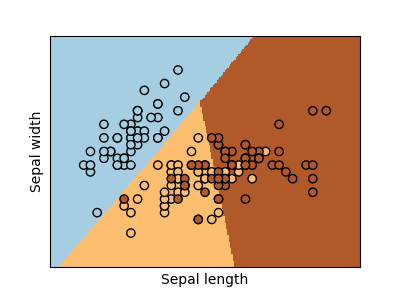

## Homework Items

1. Find a classification dataset on Kaggle 
2. Build a LogisticRegression model
3. Draw the decision boundary
4. Compare the performance of the classifer in the same dataset for:
    * Naive Bayes
    * Decision Tree Classifier
    * MLP Classifier
5. Use `train_test_split` to validate the performance of each model